<a href="https://colab.research.google.com/github/SachinMhetre678/Machine_Learning/blob/main/KNN/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df =pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


<Axes: xlabel='Gene One', ylabel='Gene Two'>

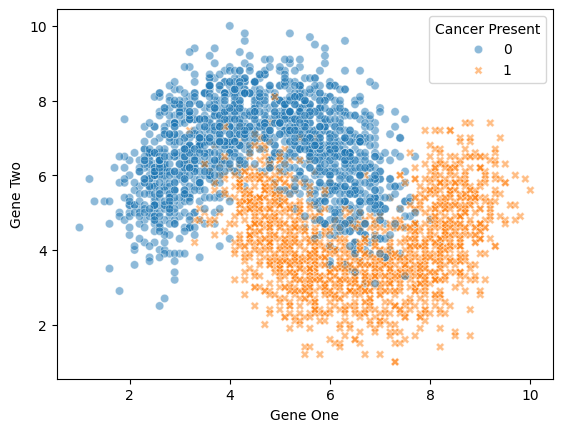

In [14]:
sns.scatterplot(data=df,x='Gene One',y='Gene Two',hue='Cancer Present',alpha=0.5,style='Cancer Present')


In [9]:
len(df)

3000

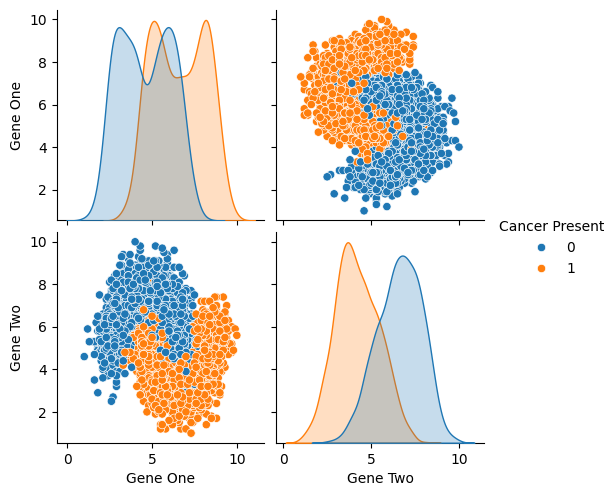

In [15]:
sns.pairplot(data=df,hue='Cancer Present')

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [117]:
x = df.drop('Cancer Present',axis=1)
y = df['Cancer Present']

In [152]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=101)

In [153]:
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

In [160]:
knn_model = KNeighborsClassifier(n_neighbors=6)

In [161]:
knn_model.fit(scaled_x_train,y_train)

KNeighborsClassifier(n_neighbors=6)

In [162]:
y_pred = knn_model.predict(scaled_x_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report

In [163]:
confusion_matrix(y_test,y_pred)

array([[399,  24],
       [ 30, 447]])

In [86]:
len(y_test)

900

In [164]:
accuracy_score(y_test,y_pred)*100

94.0

In [159]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       423
           1       0.94      0.94      0.94       477

    accuracy                           0.94       900
   macro avg       0.94      0.94      0.94       900
weighted avg       0.94      0.94      0.94       900



In [112]:
df['Cancer Present'].value_counts()

1    1500
0    1500
Name: Cancer Present, dtype: int64

In [165]:
test_error_rates = []

for k in range(1,30):
  knn_model = KNeighborsClassifier(n_neighbors=k)
  knn_model.fit(scaled_x_train,y_train)

  y_pred_test = knn_model.predict(scaled_x_test)
  test_error = 1 - accuracy_score(y_test,y_pred_test)
  test_error_rates.append(test_error)

In [ ]:
test_error_rates

Text(0.5, 0, 'K Neighbors')

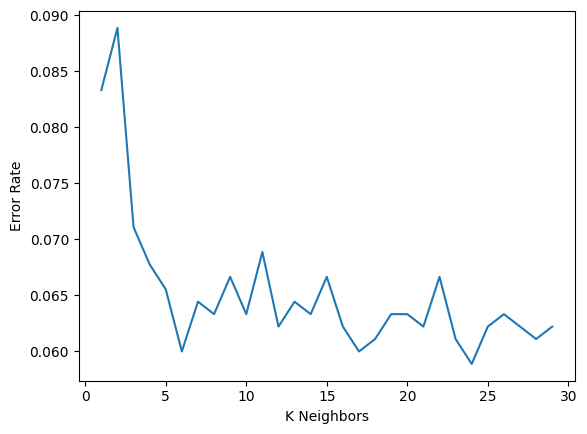

In [166]:
plt.plot(range(1,30),test_error_rates)
plt.ylabel('Error Rate')
plt.xlabel('K Neighbors')